# 数据处理

## 数据读取

In [1]:
import os
import csv
import pandas as pd
# import matplotlib as mpl
# import matplotlib.pyplot as plt

data_file_path =  'phm-ieee-2012-data-challenge-dataset-master\Learning_set\Bearing1_1'
data_file_subfile = 'acc_00001.csv'

data_file_subpath = os.path.join(data_file_path, data_file_subfile)
subfloders = os.listdir(data_file_path)      # 列出文件夹下所有的目录与文件
# print(type(subfloders[0]), len(subfloders), subfloders[0])
data = []
i = 0
for subfloder in subfloders:
    if (i < 1):
        subfloder_path = os.path.join(data_file_path, subfloder)    # 合并成一个完整的路径
        if os.path.isfile(subfloder_path):    # 判断是否是文件
            # print('file:', subfloder_path)
            with open(subfloder_path, 'r') as data_file:
                data_reader = csv.reader(data_file, delimiter=',')
                for row in data_reader:
                    # j = 0
                    # j += 1
                    # if i>0:
                    #     row[2] = int(row[2]) - 9*i
                        # if j==1:
                        #     print(type(row[2]))
                        data.append(row)
        i += 1
print(len(data))


# with open(data_file_subpath, 'r') as data_file:
#     data_reader = csv.reader(data_file, delimiter=',')
#     data = []
#     for row in data_reader:
#         data.append(row)
#     # print(data[0:5])
# print(len(data))

# 将数据转换为DataFrame
bearing_columns = ['hour', 'minute', 'second', 'micro', 'Horizontal_acceleration', 'Vertical_acceleration']
bearing_data = pd.DataFrame(data, columns=bearing_columns)

# 将原始数据转换为合适的数据类型
# bearing_data['micro'] = pd.to_numeric(bearing_data['micro'], errors='coerce')
bearing_data['hour'] = bearing_data['hour'].astype('int16')
bearing_data['minute'] = bearing_data['minute'].astype('int16')
bearing_data['second'] = bearing_data['second'].astype('int16')
bearing_data['micro'] = bearing_data['micro'].astype('float32')
bearing_data['Horizontal_acceleration'] = bearing_data['Horizontal_acceleration'].astype('float32')
bearing_data['Vertical_acceleration'] = bearing_data['Vertical_acceleration'].astype('float32')

# 将时间转换为时间戳
time = pd.to_timedelta(bearing_data['hour'], unit='h') + pd.to_timedelta(bearing_data['minute'], unit='m') + pd.to_timedelta(bearing_data['second'], unit='s') + pd.to_timedelta(bearing_data['micro'], unit='us')
bearing_data['time'] = time
# print(time.head())
# bearing_newdata = bearing_data.iloc[;, 4:5].copy()

# print(bearing_data.head())
bearing_data.info()


2560
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   hour                     2560 non-null   int16          
 1   minute                   2560 non-null   int16          
 2   second                   2560 non-null   int16          
 3   micro                    2560 non-null   float32        
 4   Horizontal_acceleration  2560 non-null   float32        
 5   Vertical_acceleration    2560 non-null   float32        
 6   time                     2560 non-null   timedelta64[ns]
dtypes: float32(3), int16(3), timedelta64[ns](1)
memory usage: 65.1 KB


## 数据——振动信号的展示

### 时域信号

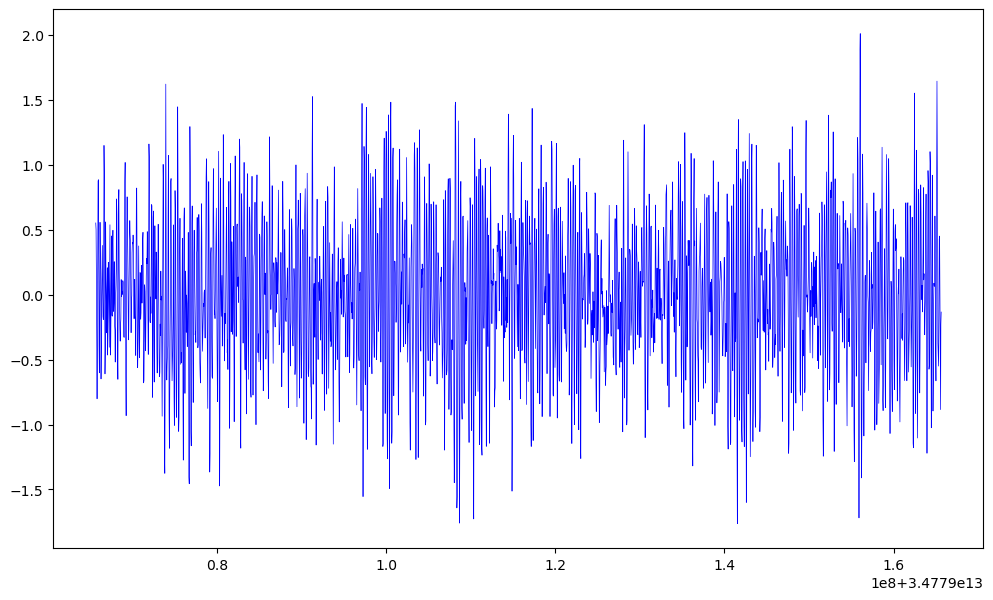

In [2]:
## 绘制振动信号图
import matplotlib.pyplot as plt
import numpy as np

length = len(data)
fig ,ax = plt.subplots()
fig.set_size_inches(12, 7)
# ax = fig.add_subplot(111, projection='3d')
# plt.plot(bearing_data.loc[ 0:2000:500, 'micro'], bearing_data.loc[0:2000:500, 'Horizontal_acceleration'])
# plt.scatter(bearing_data.loc[ 0:2000:10, 'micro'], bearing_data.loc[0:2000:10, 'Horizontal_acceleration'])
# ax.set_xticks(range(60000, 200000, 10000))
# ax.set_yticks([])
# ax.scatter(bearing_data.loc[ 0:2559:1, 'micro'], bearing_data.loc[0:2559:1, 'Horizontal_acceleration'], s = 0.5, c = 'r', marker = 'o', label = 'Horizontal_acceleration')
# ax.plot(bearing_data.loc[ 0:length:1, 'micro']/100, bearing_data.loc[0:length:1, 'Horizontal_acceleration'], linewidth = 0.5, c = 'b', label = 'Horizontal_acceleration')
ax.plot(bearing_data.loc[ 0:length:1, 'time'], bearing_data.loc[0:length:1, 'Horizontal_acceleration'], linewidth = 0.5, c = 'b', label = 'Horizontal_acceleration')



### 频域信号


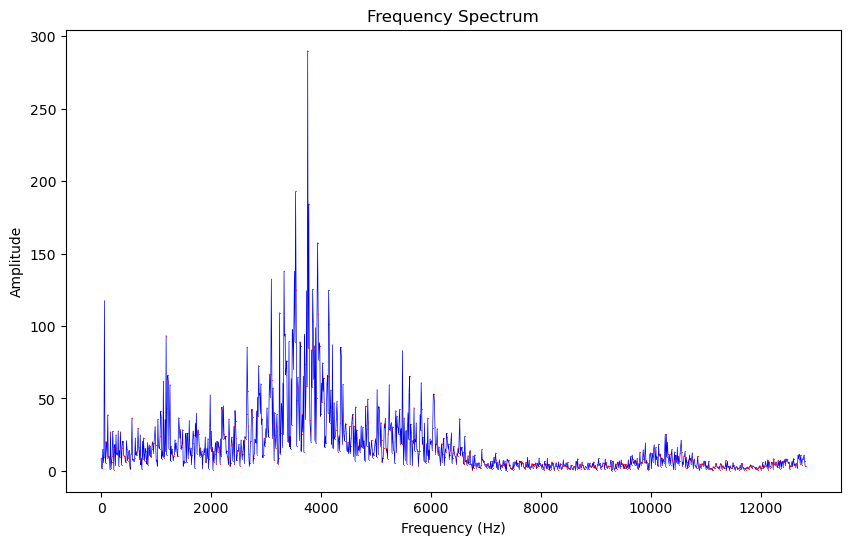

In [13]:
# 对原始信号进行傅里叶变换
# 计算采样频率
fs = 1 / (bearing_data['time'][1] - bearing_data['time'][0]).total_seconds()
# 计算信号的长度
n = len(bearing_data.loc[:, 'Horizontal_acceleration'])
# 计算频率
f = np.linspace(0, fs, n)
# 计算频谱
fft = np.fft.fft(bearing_data['Horizontal_acceleration'])
# 计算频谱的幅值
fft_amp = np.abs(fft)
# 计算频谱的相位
fft_phase = np.angle(fft)

# 绘制频谱图
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.plot(f[:n//2], fft_amp[:n//2], linewidth = 0.5, c = 'b', label = 'Amplitude', marker = 'o', markersize = 0.5, markerfacecolor = 'r', markeredgecolor = 'r', markeredgewidth = 0.2)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude')
ax.set_title('Frequency Spectrum')
plt.show()


## 计算振动信号的特征

#### 时域特征

- **峰值：** $P$
- **均方根值：**$ RMS = \sqrt{\frac{{\sum_{n = 1}^{N}}(x(n))^{2}}{N}} $
- **方差：**$\sigma^{2} = \frac{1}{N} \sum_{n = 1}^{N}\left(x_{n}-\bar{X}\right)^{2}$
- **整流平均值：**   【信号数据绝对值的平均值】   $Rectified average=\frac{\sum_{n=1}^{N}\left | x(n) \right | }{N} $
- **峰峰值：**      $PP= max-min$
- **方根幅值：**   Root mean square amplitude     $RMSA=\left [ \frac{\sum_{n=1}^{N} \sqrt{\left |x(n)  \right | } }{N}  \right ] ^{2}$
- **峭度：**        $=\frac{\sum_{n=1}^{N} \left [ x(n)-\bar{X}\right ] ^4}{(N-1)\sigma ^4} $
- **偏度：**        $=\frac{\sum_{n=1}\left[{N}-\bar{X}\right]^3}{(N-1)\sigma ^3}$
- **波形因子：**    $=\frac{RMS}{Rectified average}$
- **峰值因子：**    $ =\frac{P}{RMS}$
- **脉冲因子：**    $=\frac{P}{Rectified average}$
- **裕度因子：**    $\frac{P}{RMSA}$
- **冲击DB值：**    $$
- **能量**：$X_e = \sum^{N}_{n=1}x_n^2$
- 

In [3]:
# 计算数据的统计特性

# 峰值
peak_value = bearing_data['Horizontal_acceleration'].max()  # 峰值
peak_index = bearing_data['Horizontal_acceleration'].idxmax()  # 峰值索引

# 均方根值
rms_value = np.sqrt(np.mean(bearing_data['Horizontal_acceleration']**2))

# 方差
variance_value = np.var(bearing_data['Horizontal_acceleration'])

# 整流平均值
rectified_mean = np.mean(np.abs(bearing_data['Horizontal_acceleration']))

# 峰峰值
peak_to_peak_value = bearing_data['Horizontal_acceleration'].max() - bearing_data['Horizontal_acceleration'].min()

# 方根幅值
rmsa = np.mean(np.sqrt(np.abs(bearing_data['Horizontal_acceleration'])))**2

# 峭度
kurtosis_value = bearing_data['Horizontal_acceleration'].kurt()     # 使用pandas的kurt()函数计算峭度

# 偏度
skewness_value = bearing_data['Horizontal_acceleration'].skew()     # 使用pandas的skew()函数计算偏度

# 波形因子
waveform_factor = rms_value / rectified_mean

# 峰值因子
peak_factor = peak_value / rms_value

# 脉冲因子
impulse_factor = peak_value / rectified_mean

# 裕度因子
margin_factor = peak_value / rmsa

# 能量
energy = np.sum(bearing_data['Horizontal_acceleration']**2)

# 打印统计特性
print('峰值:', peak_value)
print('峰值索引:', peak_index)
print('均方根值:', rms_value)
print('方差:', variance_value)
print('整流平均值:', rectified_mean)
print('峰峰值:', peak_to_peak_value)
print('方根幅值:', rmsa)
print('峭度:', kurtosis_value)
print('偏度:', skewness_value)
print('波形因子:', waveform_factor)
print('峰值因子:', peak_factor)
print('脉冲因子:', impulse_factor)
print('裕度因子:', margin_factor)


峰值: 2.009999990463257
峰值索引: 2314
均方根值: 0.56174564
方差: 0.3155462145805359
整流平均值: 0.45087385
峰峰值: 3.7730000019073486
方根幅值: 0.3831446405144767
峭度: -0.12937474
偏度: -0.004713718
波形因子: 1.2459042
峰值因子: 3.5781318703705907
脉冲因子: 4.45800966843671
裕度因子: 5.246060568051482


#### 频域特征

- 滚动体通过内圈频率（Ball Pass Frequency Inner Race，BPFI）：
- 滚动体通过外圈频率（Ball Pass Frequency Outer Race，BPFO）：
- 保持架旋转频率（Fundamental Train Frequency，FTF）：
- 滚动体自转频率（Ball Spain Frequency，BSF）：

令振动信号的频谱值fft为$y_n$，频率为$f_n$，频谱长度为N，则频域特征的计算公式如下：
- 平均频率：$f_{mean} = \frac{\sum_{n=1}^{N}y_n}{N}$
- 均方根频率：$f_{RMS} = \sqrt{\frac{\sum_{n=1}^{N}y_n^2}{N}}$
- 频率标准差：$\sigma_f = \sqrt{\frac{\sum_{n=1}^{N}(f_n-f_{mean})^2y_n}{N}}$
- 中心频率：$f_{median} = \frac{\sum_{n=1}^{N} y_n\cdot f_n}{\sum^{N}_{n=1}y_n}$

In [ ]:
N = len(bearing_data['Horizontal_acceleration'])
# 计算平均频率
f_mean = np.mean(f[np.where(fft_amp > 0.1 * fft_amp.max())])

# 计算频谱的主频
f_max = f[np.argmax(fft_amp)]

# 计算均方根频率
f_rms = np.sqrt(np.sum(fft_amp**2) / N)

# 计算频率标准差
f_std = np.sqrt(np.sum((f - f_mean)**2 * fft_amp**2) / N)

# 计算中心频率
f_median = np.sum(f * fft_amp) / np.sum(fft_amp)